---
**<center><h1>Bank Note Authentication UCI</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset originates from images of genuine and forged banknotes, captured using an industrial camera typically used for print inspection. The images have a resolution of approximately 660 dpi and are grayscale with dimensions of 400x400 pixels. Features extracted using Wavelet Transform from these images enable binary classification tasks. The objective is to develop machine learning models that accurately distinguish between genuine and forged banknotes based on these extracted features.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ritesaluja/bank-note-authentication-uci-data -f  BankNote_Authentication.csv

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data
License(s): copyright-authors
  0%|                                               | 0.00/45.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 45.4k/45.4k [00:00<00:00, 52.6MB/s]


In [5]:
D = pd.read_csv('BankNote_Authentication.csv')
data = D.copy()

# **Take a look at the data**
---

In [6]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
data.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [8]:
data['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# **Exploratory Data Analysis**
---

**Univariate Analysis**

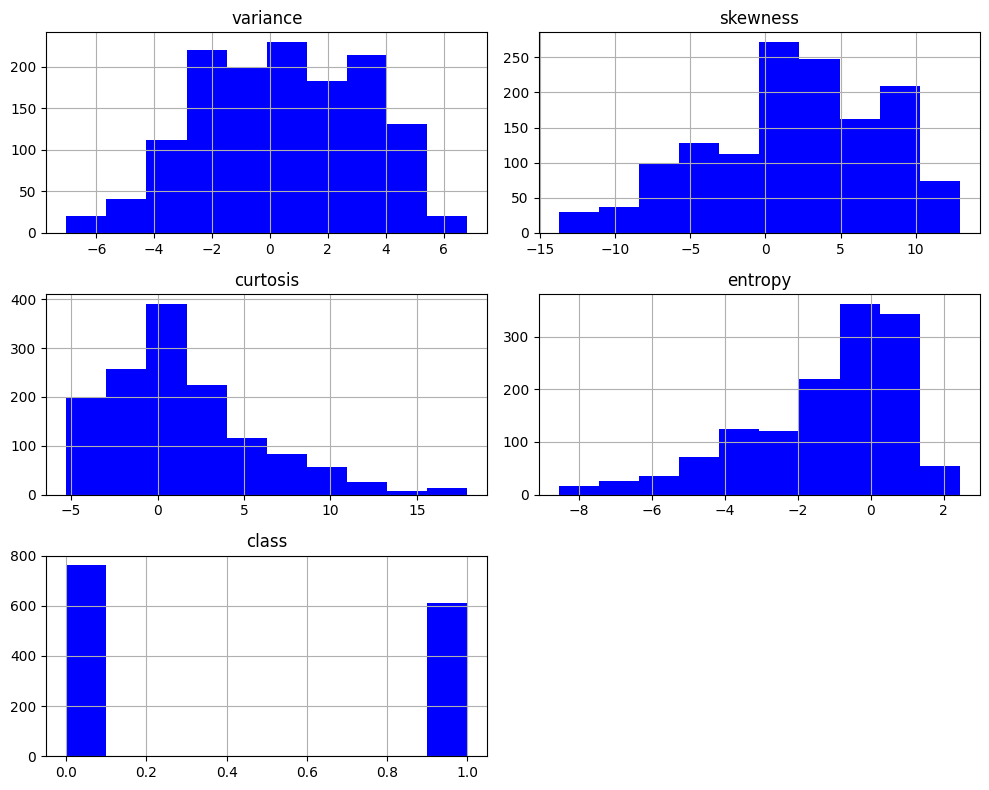

In [11]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

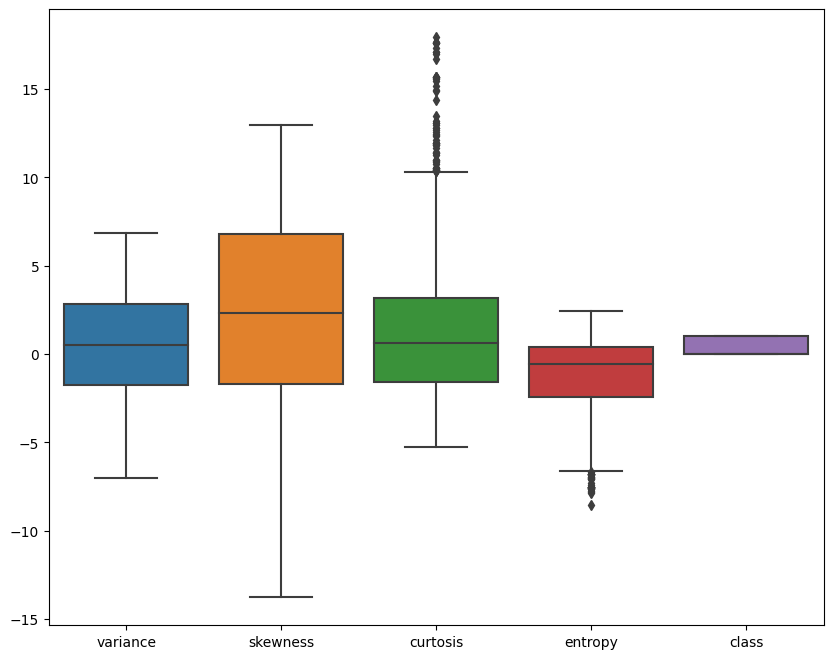

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

In [13]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

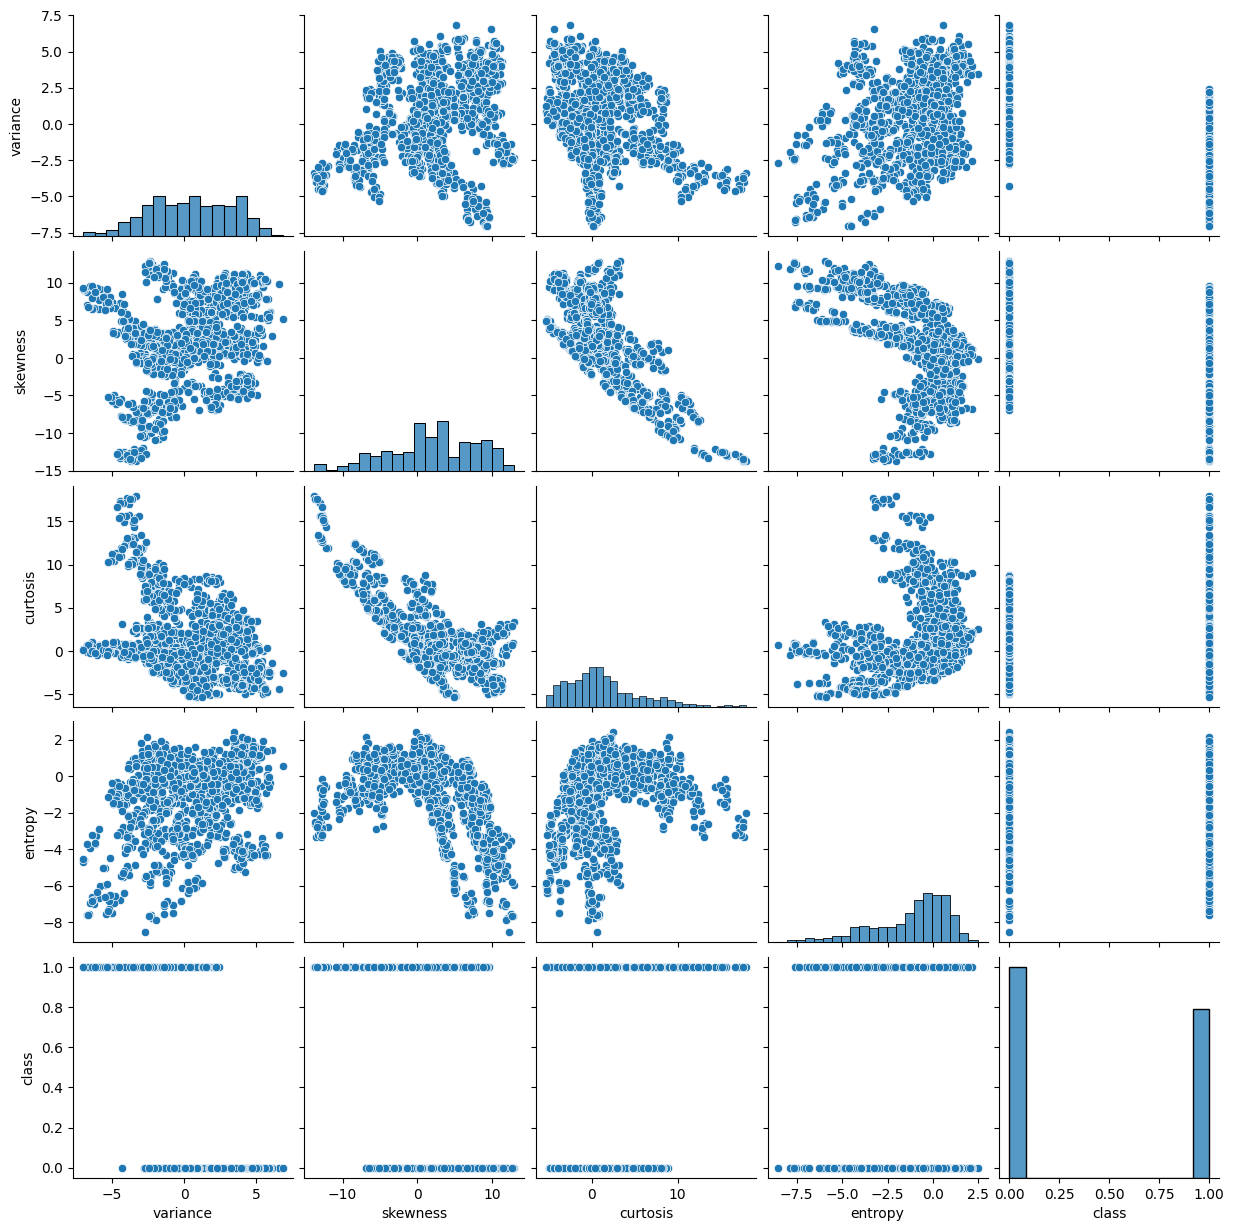

In [14]:
sns.pairplot(data.select_dtypes(include='number'))
plt.show()

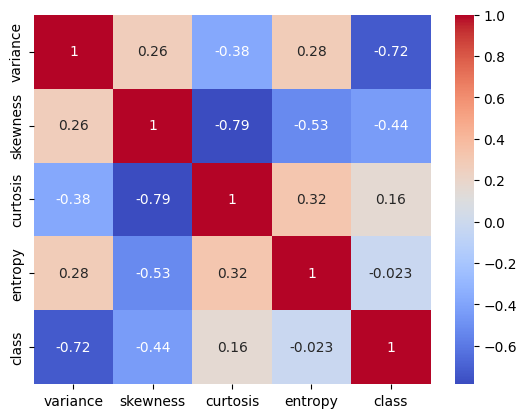

In [15]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [16]:
data.duplicated().sum()

24

In [17]:
data.drop_duplicates()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


**Handling Missing Data**

In [18]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
variance,0,0.0
skewness,0,0.0
curtosis,0,0.0
entropy,0,0.0
class,0,0.0


In [19]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Outliers**

In [20]:
# Assuming data is a pandas DataFrame
from scipy import stats
z_scores = np.abs(stats.zscore(data))
outliers = data[(z_scores > 3).any(axis=1)]

print("Outliers using Z-score method:")
print(outliers)

Outliers using Z-score method:
      variance  skewness   curtosis  entropy  class
45    -0.78690    9.5663  -3.786700 -7.50340      0
47    -0.78690    9.5663  -3.786700 -7.50340      0
194   -2.34100   12.3784   0.704030 -7.58360      0
202   -0.78689    9.5663  -3.786700 -7.50340      0
291   -2.21530   11.9625   0.078538 -7.78530      0
394   -2.26230   12.1177   0.288460 -7.75810      0
465   -2.69890   12.1984   0.676610 -8.54820      0
529   -1.38850   12.5026   0.691180 -7.54870      0
562   -2.46040   12.7302   0.917380 -7.64180      0
581   -1.96670   11.8052  -0.404720 -7.87190      0
740   -2.44730   12.6247   0.735730 -7.66120      0
765   -3.84830  -12.8047  15.682400 -1.28100      1
820   -4.00250  -13.4979  17.677200 -3.32020      1
826   -4.21100  -12.4736  14.970400 -1.38840      1
881   -4.48610  -13.2889  17.308700 -3.21940      1
887   -3.26920  -12.7406  15.557300 -0.14182      1
942   -3.37930  -13.7731  17.927400 -2.03230      1
948   -3.49170  -12.1736  14.3689

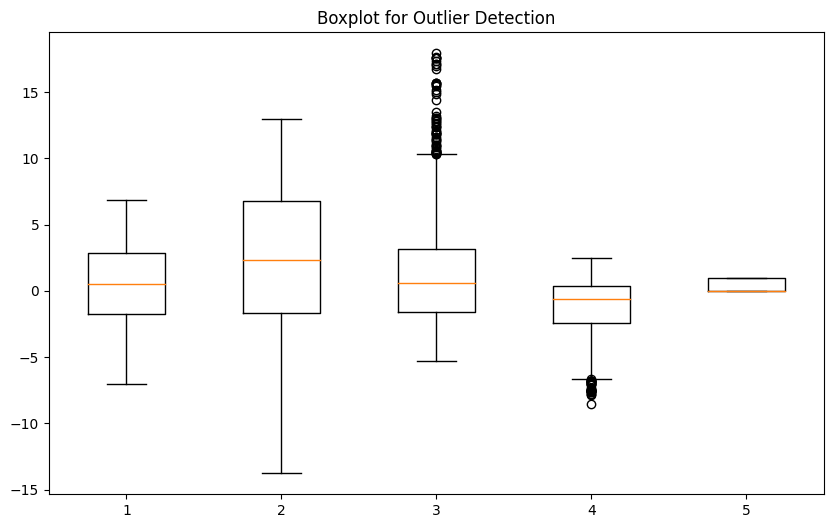

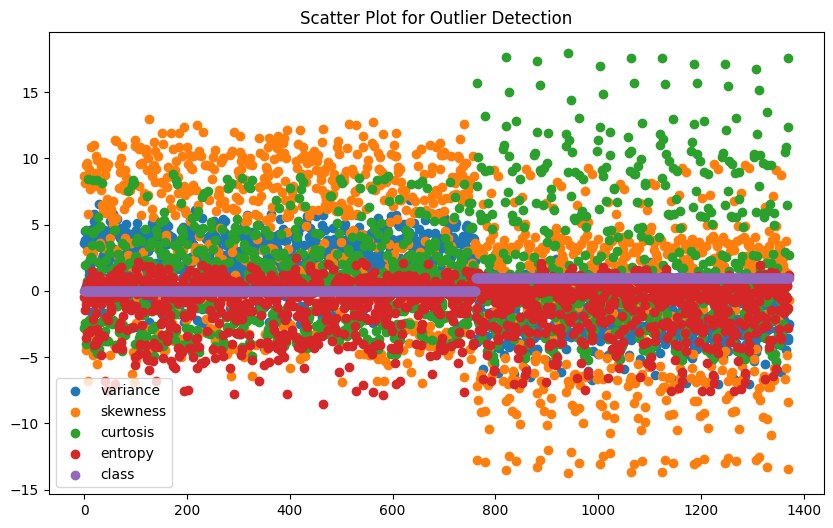

In [21]:
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Boxplot for Outlier Detection')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.scatter(range(len(data)), data[column], label=column)
plt.title('Scatter Plot for Outlier Detection')
plt.legend()
plt.show()


In [22]:
log_data = np.log(data+1)

**Data splitting**

In [23]:
X = data.drop('class' , axis = 1)
y = data['class']

In [24]:
X_train  , X_test , y_train, y_test = train_test_split(X,y , train_size=.4 , shuffle = True ,random_state=101)
X_test , X_val , y_test , y_val = train_test_split(X_test,y_test , train_size=.2 ,random_state=101)

**Data Normalization**

(array([[  0.,   0.,  24., 148., 189., 175.,  12.,   0.,   0.,   0.],
        [ 15.,  18.,  68.,  51., 113., 106.,  92.,  80.,   5.,   0.],
        [  0.,   0.,  26., 151., 188.,  87.,  51.,  28.,   6.,  11.],
        [  0.,   5.,  40., 178., 323.,   2.,   0.,   0.,   0.,   0.]]),
 array([-13.7731 , -10.60305,  -7.433  ,  -4.26295,  -1.0929 ,   2.07715,
          5.2472 ,   8.41725,  11.5873 ,  14.75735,  17.9274 ]),
 <a list of 4 BarContainer objects>)

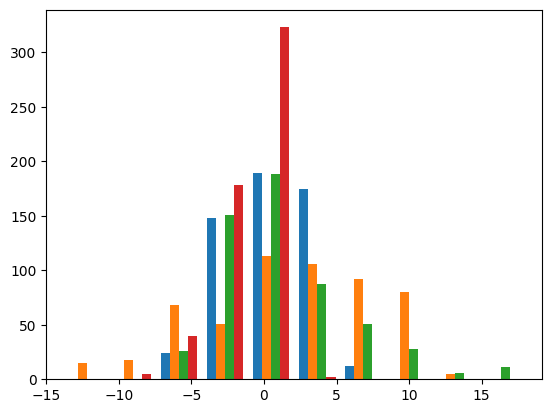

In [25]:
plt.hist (X_train)

In [26]:
from sklearn.preprocessing import StandardScaler
# Create a scaler, fit and transform the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# **Traditional models**
---

In [27]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

In [28]:
from sklearn.model_selection import cross_val_score

for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
    print(f'{clf_name}: Mean accuracy = {scores.mean():.2f}')


Logistic Regression: Mean accuracy = 0.99
Decision Tree: Mean accuracy = 0.98
Random Forest: Mean accuracy = 1.00
K-Nearest Neighbors: Mean accuracy = 1.00
Support Vector Machine: Mean accuracy = 1.00
Naive Bayes: Mean accuracy = 0.84
AdaBoost: Mean accuracy = 0.99
Gradient Boosting: Mean accuracy = 1.00


In [29]:
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# List of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    print('---------------------------------------------------')


Logistic Regression: F1 Score = 0.99
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       191
           1       0.97      1.00      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

---------------------------------------------------
Decision Tree: F1 Score = 0.98
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       191
           1       0.98      0.97      0.97       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343

---------------------------------------------------
Random Forest: F1 Score = 1.00
Random Forest Classification Report:
              precision   

# **Deep Neural Network**

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import *
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score

2024-07-17 05:21:12.790314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 05:21:12.790460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 05:21:12.961857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
model = keras.Sequential()
model.add(Dense(units =64 ,activation='relu',input_dim =4))
model.add(Dense(units=28,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )

In [32]:
note = model.fit(X_train,y_train,batch_size=24,epochs=100,validation_split=0.25,callbacks=[early_stoping],verbose=0)

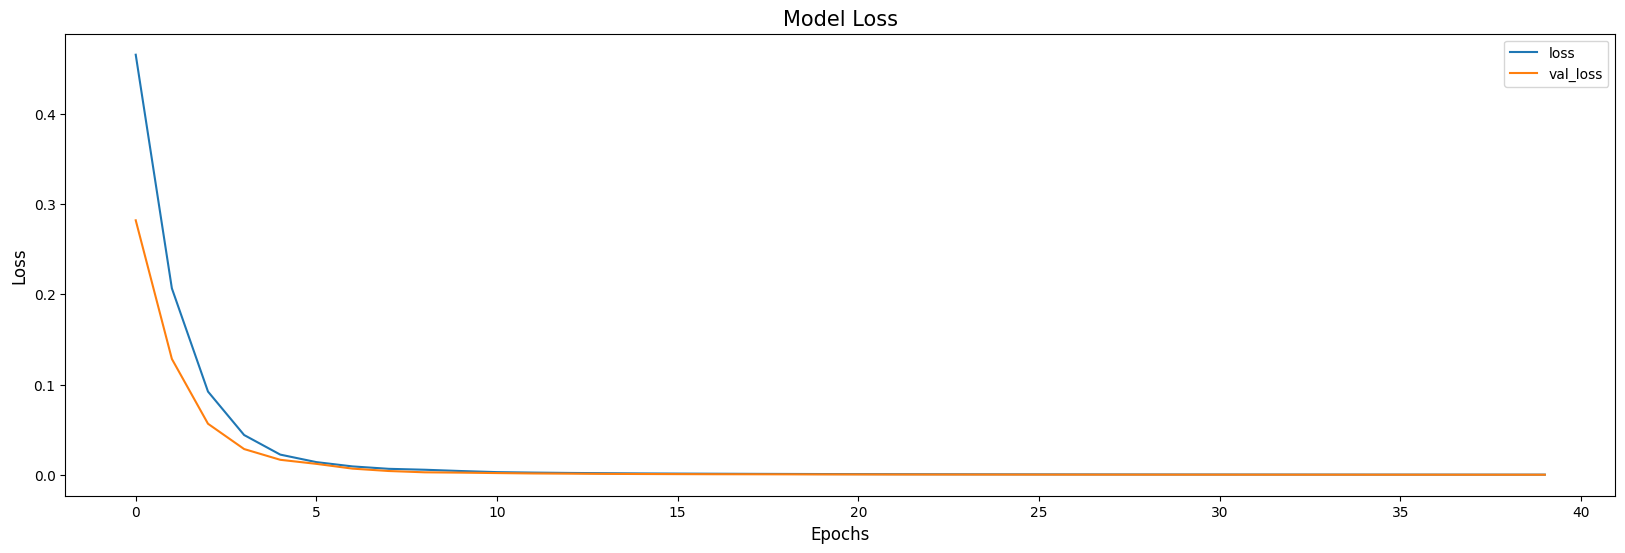

In [33]:
# plots for loss and accuracy of train data

loss = pd.DataFrame(note.history)

# loss for model with epochs
loss.loc[:,['loss','val_loss']].plot(figsize=(20,6))
plt.title('Model Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.show()

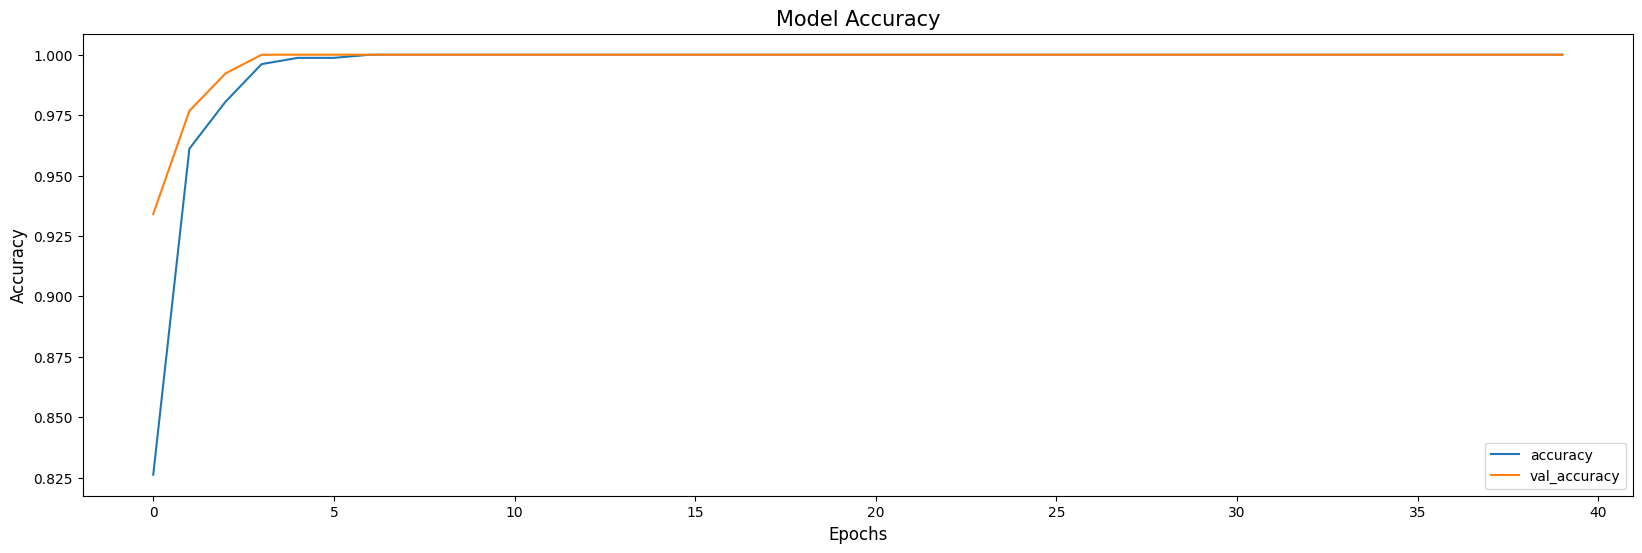

In [34]:
# Accuracy plot for model
loss.loc[:,['accuracy','val_accuracy']].plot(figsize=(20,6))
plt.title('Model Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

In [35]:
# create predictions from X_test
pred = model.predict(X_test)

# pred if >0.5 =1 else 0
pred = np.where(pred>0.5,1,0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [36]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test,pred)
print(cm)

[[191   0]
 [  0 152]]


# **Cluster**

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

algorithms = [
    ('KMeans', KMeans(n_clusters=3, random_state=33)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=3))
]

for name, algorithm in algorithms:
    y_pred = algorithm.fit_predict(X_train)

    silhouette_avg = silhouette_score(X_train, y_pred)
    davies_bouldin = davies_bouldin_score(X_train, y_pred)
    calinski_harabasz = calinski_harabasz_score(X_train, y_pred)

    print(f"Algorithm: {name}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print()


Algorithm: KMeans
Silhouette Score: 0.3719
Davies-Bouldin Index: 0.9385
Calinski-Harabasz Index: 1046.6151

Algorithm: Agglomerative
Silhouette Score: 0.3520
Davies-Bouldin Index: 0.9580
Calinski-Harabasz Index: 972.0946



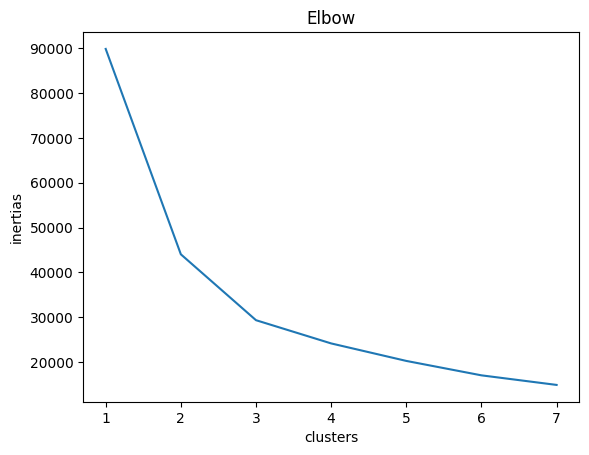

In [39]:
from sklearn.cluster import KMeans
ilist = []
n = 8
for i in range(1,n):
    kmeans =  KMeans(n_clusters=i,init='k-means++', #also can be random
                     random_state=33,algorithm= 'lloyd' , n_init= 3) # also can be full or elkan
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)

plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()
